#### Import the packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from wordcloud import STOPWORDS

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
import os
for dirname, _, filenames in os.walk('Book'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Book/.DS_Store
Book/books_data.csv
Book/Books_rating.csv


## Method

### Dataset

The dataset for this research comprises comprehensive Amazon book reviews, encapsulating both qualitative and quantitative elements that offer insights into consumer behaviors and preferences within the literary market. The `books_data` segment of the dataset presents essential bibliographic information, capturing the title, authorship details, visual and digital book previews, publisher information, publication date, online info links, genres, and reader engagement quantified through ratings counts.

Concurrently, the `books_rating` portion features a granular view of individual consumer feedback, expressed through unique identifiers, profile names, helpfulness of reviews, numeric scores, temporal markers of reviews, summaries, and the complete textual content of the reviews. This multifaceted dataset not only enables a sentiment analysis of textual reviews to assess the emotions and opinions expressed by readers but also facilitates a deeper examination of the factors influencing the numerical scores books receive.

By synthesizing these diverse data points, the study aims to model and predict how sentiment embedded within reviews correlates with the books' overall ratings, offering a predictive lens on how consumer sentiment potentially sways purchasing decisions. This detailed exploration of the dataset will support the research question and enhance the comprehension of the underlying analysis.

For an in-depth overview of the dataset, please refer to the resources provided on Kaggle, which host discussions and downloadable content related to the dataset[Kaggle Discussion](https://www.kaggle.com/discussions/general/354528)

Through the methodical scrutiny of this dataset, the research aims to present a well-substantiated narrative on the predictive power of sentiment analysis in the realm of online book commerce.

In [4]:
books_data = pd.read_csv('Book/books_data.csv')
books_rating = pd.read_csv('Book/Books_rating.csv')

In [5]:
books_data.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


In [6]:
books_rating.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


## Clean data

In my approach to preparing the dataset for analysis, I initiated the process by merging the `books_rating` and `books_data` datasets on the "Title" feature.  This allowed me to create a singular, cohesive dataset, ensuring that each book's ratings and reviews were matched with the corresponding metadata, such as authors and categories.

In [7]:
data = pd.merge(books_rating,books_data, on = 'Title')
data.shape

(3000000, 19)

Following the merge, I focused on extracting only the columns pertinent to my research from this combined dataset: "Title," "review/score," "review/text," "authors," "categories," and "ratingsCount."  The selection of these specific columns was intentional, as they provide the critical information needed for the sentiment analysis, and the numerical scores offer a quantifiable measure of reader perception.

In [8]:
# Extracting usefull columns for our analysis
data = data[['Title', 'description', 'review/score','review/text','authors','categories','ratingsCount']]

To enhance the dataset's quality, I eliminated duplicate entries, ensuring that each book's title and associated review were unique.  This step prevents the skewing of results due to redundant data.  Additionally, I removed any rows with missing values, as incomplete data could compromise the integrity of my analyses.

In [9]:
# Dropping Duplicates
data.drop_duplicates(inplace = True)

# Dropping Null Values
data.dropna(inplace = True)
data.isna().sum()

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1279826 entries, 47 to 2999999
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Title         1279826 non-null  object 
 1   description   1279826 non-null  object 
 2   review/score  1279826 non-null  float64
 3   review/text   1279826 non-null  object 
 4   authors       1279826 non-null  object 
 5   categories    1279826 non-null  object 
 6   ratingsCount  1279826 non-null  float64
dtypes: float64(2), object(5)
memory usage: 78.1+ MB


In [10]:
# Removes brackets and quotes from authors name
data['authors'] = data['authors'].str.replace(r"[\"\',]", '')
# Removes brackets and quotes from categories
data['categories'] = data['categories'].str.replace(r"[\"\',]", '')

/var/folders/q8/7w59pt4j15s7l481z44_bq3c0000gq/T/ipykernel_69043/2504092942.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['authors'] = data['authors'].str.replace(r"[\"\',]", '')
/var/folders/q8/7w59pt4j15s7l481z44_bq3c0000gq/T/ipykernel_69043/2504092942.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data['categories'] = data['categories'].str.replace(r"[\"\',]", '')


In [11]:
data.head()

,Title,description,review/score,review/text,authors,categories,ratingsCount
47,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,5.0,With the publication of Everett Ferguson's boo...,[Everett Ferguson],[Religion],5.0
48,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,5.0,Everett Ferguson approaches the subject of ear...,[Everett Ferguson],[Religion],5.0
49,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,4.0,This book is a continual resource. It is so bi...,[Everett Ferguson],[Religion],5.0
50,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,4.0,This is a very useful and thorough text book. ...,[Everett Ferguson],[Religion],5.0
181,Voices from the Farm: Adventures in Community ...,"Twenty-five years ago, at the height of the co...",5.0,"Ironically, I grew up in a small town close to...",[Rupert Fike],[Biography & Autobiography],1.0


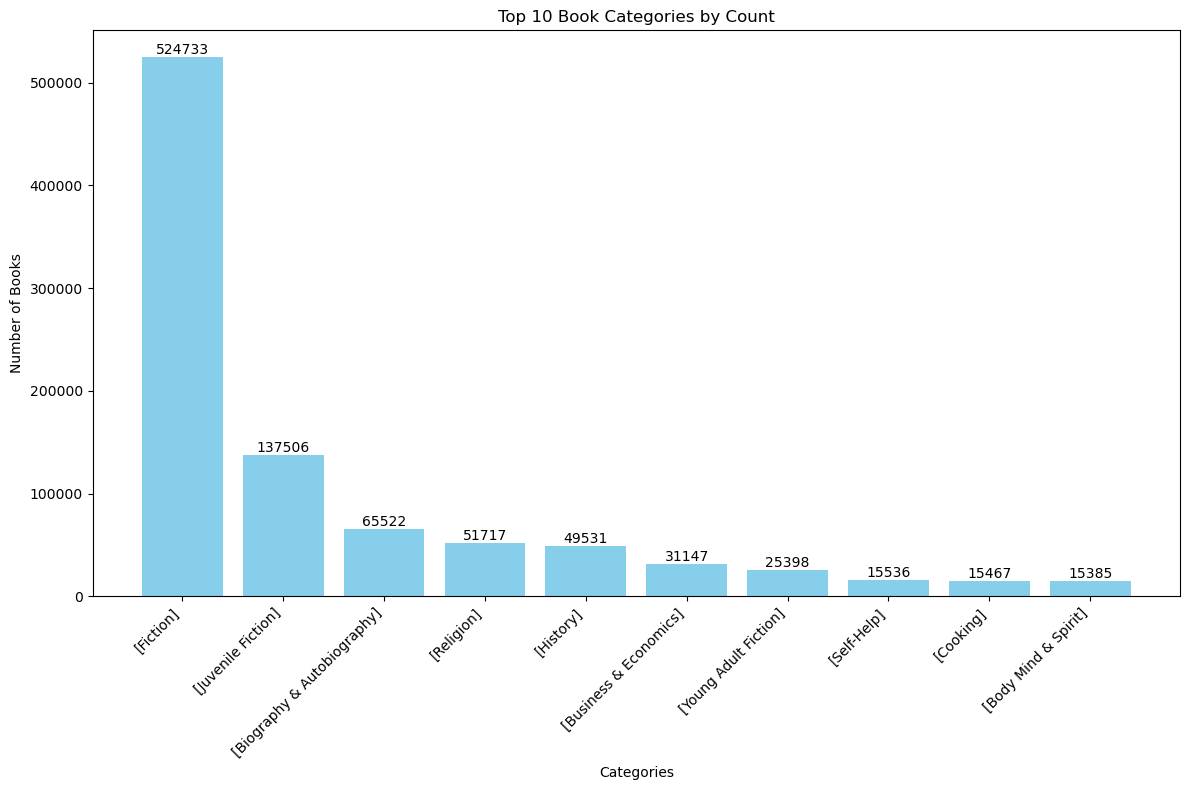

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval

# Explode the 'categories' list into individual rows to handle multiple categories per book.
data_exploded = data.explode('categories')

# Count the number of books per category and sort them in descending order.
category_counts = data_exploded['categories'].value_counts()

# Take the top 10 most frequent categories.
top_categories = category_counts.head(10)

# Plot a bar chart for the top 10 categories.
plt.figure(figsize=(12, 8))
bars = plt.bar(top_categories.index, top_categories.values, color='skyblue')

# Add title and labels with American English spelling.
plt.title('Top 10 Book Categories by Count')
plt.xlabel('Categories')
plt.ylabel('Number of Books')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability.

# Add text labels above the bars.
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

# Display the plot.
plt.tight_layout()
plt.show()

/var/folders/q8/7w59pt4j15s7l481z44_bq3c0000gq/T/ipykernel_44196/3705501590.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fiction_data['review/score'] = pd.to_numeric(fiction_data['review/score'], errors='coerce')


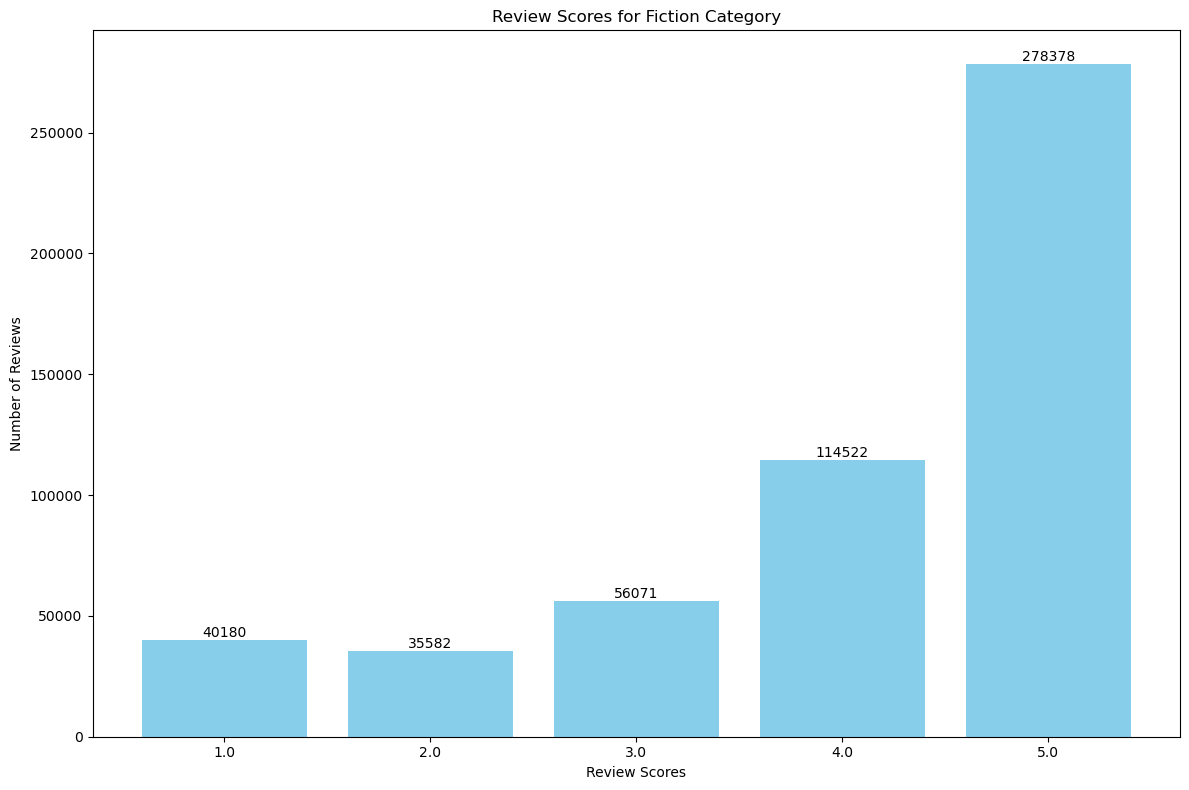

In [38]:
# Explode the 'categories' column so each category has its own row
data_exploded_2 = data.explode('categories')

# Filter the DataFrame to only include books with the 'Fiction' category.
fiction_data = data_exploded_2[data_exploded_2['categories'] == '[Fiction]']

# Ensure 'review/score' is numeric
fiction_data['review/score'] = pd.to_numeric(fiction_data['review/score'], errors='coerce')

# Count the number of reviews per score within the Fiction category.
review_score_counts = fiction_data['review/score'].value_counts().reindex([1.0, 2.0, 3.0, 4.0, 5.0], fill_value=0)

# Plot a bar chart for the review scores of the Fiction category.
plt.figure(figsize=(12, 8))
bars = plt.bar(review_score_counts.index.astype(str), review_score_counts.values, color='skyblue')

# Add title and labels.
plt.title('Review Scores for Fiction Category')
plt.xlabel('Review Scores')
plt.ylabel('Number of Reviews')

# Add text labels above the bars for each review score count.
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

# Display the plot.
plt.tight_layout()
plt.show()

In [39]:
# Explode the 'categories' column so each category has its own row
data_exploded_3 = data.explode('categories')

# Filter for rows where the category is 'Fiction'
fiction_data = data_exploded[data_exploded['categories'] == '[Fiction]']

# Initialize an empty DataFrame to hold the sample
sampled_data = pd.DataFrame()

# Sample 30,000 reviews for each score from 1.0 to 5.0
for score in [1.0, 2.0, 3.0, 4.0, 5.0]:
    score_data = fiction_data[fiction_data['review/score'] == score]
    
    # If there are fewer than 30,000 reviews for the score, take all available reviews
    n_samples = min(30000, len(score_data))
    
    # Sample n_samples of reviews
    score_sample = score_data.sample(n=n_samples, random_state=1) # random_state for reproducibility
    
    # Append the sample to the sampled_data DataFrame
    sampled_data = sampled_data.append(score_sample)

# Reset the index of the sampled_data DataFrame
sampled_data.reset_index(drop=True, inplace=True)

sampled_data.head()

/var/folders/q8/7w59pt4j15s7l481z44_bq3c0000gq/T/ipykernel_44196/938279542.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sampled_data = sampled_data.append(score_sample)
/var/folders/q8/7w59pt4j15s7l481z44_bq3c0000gq/T/ipykernel_44196/938279542.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sampled_data = sampled_data.append(score_sample)
/var/folders/q8/7w59pt4j15s7l481z44_bq3c0000gq/T/ipykernel_44196/938279542.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sampled_data = sampled_data.append(score_sample)
/var/folders/q8/7w59pt4j15s7l481z44_bq3c0000gq/T/ipykernel_44196/938279542.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

,Title,description,review/score,review/text,authors,categories,ratingsCount
0,Picture Perfect,THE INTERNATIONALLY BESTSELLING AUTHOR 'Picoul...,1.0,I became a huge Picoult fan after reading My S...,[Jodi Picoult],[Fiction],34.0
1,Slaughterhouse-Five,A special fiftieth anniversary edition of Kurt...,1.0,This book is way too confusing and jumps aroun...,[Kurt Vonnegut],[Fiction],1523.0
2,Violets Are Blue,D.C. Detective Alex Cross has seen a lot of cr...,1.0,This is perhaps the worst of the Patterson boo...,[James Patterson],[Fiction],27.0
3,The Inheritance of Loss: A Novel (Man Booker P...,Winner of the National Book Critics Circle Awa...,1.0,"The criteria for the award this won, must be h...",[Kiran Desai],[Fiction],125.0
4,Enchantment of the Faerie Realm: Communicate w...,Have you ever taken a walk in the woods and fe...,1.0,I was used to Ted Andrews writing in a style t...,[Ted Andrews],[Fiction],3.0


In [40]:
sampled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Title         150000 non-null  object 
 1   description   150000 non-null  object 
 2   review/score  150000 non-null  float64
 3   review/text   150000 non-null  object 
 4   authors       150000 non-null  object 
 5   categories    150000 non-null  object 
 6   ratingsCount  150000 non-null  float64
dtypes: float64(2), object(5)
memory usage: 8.0+ MB


In [41]:
sampled_data

,Title,description,review/score,review/text,authors,categories,ratingsCount
0,Picture Perfect,THE INTERNATIONALLY BESTSELLING AUTHOR 'Picoul...,1.0,I became a huge Picoult fan after reading My S...,[Jodi Picoult],[Fiction],34.0
1,Slaughterhouse-Five,A special fiftieth anniversary edition of Kurt...,1.0,This book is way too confusing and jumps aroun...,[Kurt Vonnegut],[Fiction],1523.0
2,Violets Are Blue,D.C. Detective Alex Cross has seen a lot of cr...,1.0,This is perhaps the worst of the Patterson boo...,[James Patterson],[Fiction],27.0
3,The Inheritance of Loss: A Novel (Man Booker P...,Winner of the National Book Critics Circle Awa...,1.0,"The criteria for the award this won, must be h...",[Kiran Desai],[Fiction],125.0
4,Enchantment of the Faerie Realm: Communicate w...,Have you ever taken a walk in the woods and fe...,1.0,I was used to Ted Andrews writing in a style t...,[Ted Andrews],[Fiction],3.0
...,...,...,...,...,...,...,...
149995,The Cobra Trilogy,"He was a New Kind of Soldier, Created for a Ne...",5.0,Great book! Well written. Author makes it seem...,[Timothy Zahn],[Fiction],1.0
149996,The Corrections,Enid Lambert begins to worry about her husband...,5.0,Brilliant. Amazing characters. Amazing writing...,[Jonathan Franzen],[Fiction],1.0
149997,Where the Heart is,"Talk about unlucky sevens. An hour ago, sevent...",5.0,I thought that this book was absolutly amazing...,[Billie Letts],[Fiction],77.0
149998,Isabel's Bed: A Novel,Traveling to Isabel Krug's Cape Cod dream hous...,5.0,Harriet is a woman in search of a life. She fi...,[Lipman],[Fiction],7.0


In [42]:
data = sampled_data

To manage computational efficiency and streamline the analysis, I opted to work with a subset of the entire dataset.  Given the expansive nature of the full dataset, which contains over 1.3 million rows, conducting exhaustive analyses on the entire corpus would demand substantial time and computational resources.  To mitigate this, I employed a random sampling technique to extract a representative subset of 50,000 records, ensuring a balance between data sufficiency for robust analysis and operational practicality.

Post-cleansing, I transformed the text to streamline the dataset for natural language processing.   This included a thorough tokenization process to break down the text into individual terms, cleaning to remove any non-alphabetic characters, and lemmatization to consolidate different forms of a word into a single, canonical form.   I also stripped away any extraneous punctuation or brackets from author names and categories, seeking a cleaner and more standardized dataset.

Lastly, I counted the words in each review post-cleaning to have a quantifiable measure of review length, which can sometimes correlate with the depth of sentiment expression.

In [43]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import words as nltk_words

# Ensure you have downloaded the necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

# Load and prepare resources
english_words = set(nltk_words.words())
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to clean and trim text
def clean_and_trim_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove or replace special characters and numbers
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords and non-english words
    words = [word for word in words if word not in stop_words and word in english_words]
    # Lemmatization
    words = [lemmatizer.lemmatize(word) for word in words]
    # Re-join the words back into a single string
    text = ' '.join(words)
    return text

# Apply the function to the dataset
data['cleaned_review'] = data['review/text'].apply(clean_and_trim_text)

# Reset the index after dropping rows
data.reset_index(drop=True, inplace=True)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/zhangxinyi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zhangxinyi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/zhangxinyi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/zhangxinyi/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [44]:
data.head()

,Title,description,review/score,review/text,authors,categories,ratingsCount,cleaned_review
0,Picture Perfect,THE INTERNATIONALLY BESTSELLING AUTHOR 'Picoul...,1.0,I became a huge Picoult fan after reading My S...,[Jodi Picoult],[Fiction],34.0,huge fan reading keeper ago absolutely devouri...
1,Slaughterhouse-Five,A special fiftieth anniversary edition of Kurt...,1.0,This book is way too confusing and jumps aroun...,[Kurt Vonnegut],[Fiction],1523.0,book way around much dont get cant believe sch...
2,Violets Are Blue,D.C. Detective Alex Cross has seen a lot of cr...,1.0,This is perhaps the worst of the Patterson boo...,[James Patterson],[Fiction],27.0,perhaps worst thats saying something writing t...
3,The Inheritance of Loss: A Novel (Man Booker P...,Winner of the National Book Critics Circle Awa...,1.0,"The criteria for the award this won, must be h...",[Kiran Desai],[Fiction],125.0,criterion award must gross get book assigned w...
4,Enchantment of the Faerie Realm: Communicate w...,Have you ever taken a walk in the woods and fe...,1.0,I was used to Ted Andrews writing in a style t...,[Ted Andrews],[Fiction],3.0,used ted writing style methodical approachable...


## TF-IDF

- What is TF-IDF:
- Imagine you're sifting through a mountain of online book reviews, trying to figure out what makes some books fan favorites. Now, some words like 'the' and 'is' pop up a lot but don't really tell you much about what's unique to each review. That's where TF-IDF comes in, which stands for Term Frequency-Inverse Document Frequency. Think of it as a clever detective tool that helps us pinpoint which words are special and weighty in each review. Here's how it works: 'Term Frequency' counts how often a word appears in a review, giving us a sense of what it's about. Then, 'Inverse Document Frequency' sizes up how common or rare that word is across all reviews we're looking at. The rarer the word, the more it may tell us about the unique flavor of that review. By combining these two measures, TF-IDF gives more importance to words that might actually help distinguish one book's reviews from another, helping us understand what might make a book stand out in the eyes of the readers.

In my analysis, I harnessed the power of TF-IDF to understand the weight of words in book reviews. Starting with the TfidfVectorizer, I transformed the cleaned text into numerical values that reflect the importance of each word in relation to the dataset. After transforming the text, I converted the TF-IDF output into a DataFrame for easier analysis, aligning words with their scores.

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the 'cleaned_des' column to get the feature vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(data['cleaned_review'])

# Create a DataFrame for tf-idf vectors with feature names as columns
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the DataFrame to check the result
print(tfidf_df.head())
print(f'Dataframe Shape: {tfidf_df.shape}')

    aa  aal  aardvark  aba  aback  abacus  abalone  abandon  abandoned  \
0  0.0  0.0       0.0  0.0    0.0     0.0      0.0      0.0        0.0   
1  0.0  0.0       0.0  0.0    0.0     0.0      0.0      0.0        0.0   
2  0.0  0.0       0.0  0.0    0.0     0.0      0.0      0.0        0.0   
3  0.0  0.0       0.0  0.0    0.0     0.0      0.0      0.0        0.0   
4  0.0  0.0       0.0  0.0    0.0     0.0      0.0      0.0        0.0   

   abandonment  ...  zoologist  zoology  zoom  zoomorphism  zoon  zootype  \
0          0.0  ...        0.0      0.0   0.0          0.0   0.0      0.0   
1          0.0  ...        0.0      0.0   0.0          0.0   0.0      0.0   
2          0.0  ...        0.0      0.0   0.0          0.0   0.0      0.0   
3          0.0  ...        0.0      0.0   0.0          0.0   0.0      0.0   
4          0.0  ...        0.0      0.0   0.0          0.0   0.0      0.0   

   zorro  zounds  zowie  zygote  
0    0.0     0.0    0.0     0.0  
1    0.0     0.0    0.0 

In [ ]:
feature_scores = zip(tfidf_vectorizer.get_feature_names_out(), tfidf_vectorizer.idf_)
for feature, score in sorted(feature_scores, key=lambda x: x[1], reverse=True):
    print(feature, score)

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text 

# Get the default English stop words from scikit-learn
default_stop_words = text.ENGLISH_STOP_WORDS

# Define the custom list of additional stop words
additional_stop_words = ["book", "read", "one","say", "ve", "like", "really", "one", "get", "go", "know", "thing", "much", "time"] 

# Combine the default stop words with your additional stop words
combined_stop_words = list(default_stop_words)+ additional_stop_words

# Initialize TfidfVectorizer with the combined list of stop words
tfidf_vectorizer = TfidfVectorizer(stop_words=combined_stop_words)

# Apply the vectorizer to the cleaned reviews
tfidf_matrix = tfidf_vectorizer.fit_transform(data['cleaned_review'])

tfidf_matrix = tfidf_vectorizer.fit_transform(data['cleaned_review'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df['review_score'] = data['review/score'].values
avg_tfidf_scores = tfidf_df.groupby('review_score').mean()
avg_tfidf_scores_transposed = avg_tfidf_scores.transpose()

In [48]:
print(avg_tfidf_scores_transposed[5.0].sort_values(ascending=False).head(10))
print('---')
print(avg_tfidf_scores_transposed[4.0].sort_values(ascending=False).head(10))
print('---')
print(avg_tfidf_scores_transposed[3.0].sort_values(ascending=False).head(10))
print('---')
print(avg_tfidf_scores_transposed[2.0].sort_values(ascending=False).head(10))
print('---')
print(avg_tfidf_scores_transposed[1.0].sort_values(ascending=False).head(10))

story      0.031456
great      0.030331
love       0.027638
reading    0.023451
best       0.022389
novel      0.020736
life       0.020694
good       0.019666
series     0.019101
way        0.015837
Name: 5.0, dtype: float64
---
story      0.036590
good       0.031597
novel      0.023995
great      0.023603
reading    0.021492
life       0.020709
series     0.019882
love       0.018580
way        0.016943
little     0.015879
Name: 4.0, dtype: float64
---
story          0.037840
good           0.031886
novel          0.023505
reading        0.021635
series         0.020899
interesting    0.019793
think          0.018553
little         0.018355
didnt          0.018122
plot           0.017285
Name: 3.0, dtype: float64
---
story        0.033512
good         0.023232
reading      0.022824
novel        0.021370
plot         0.021317
didnt        0.020950
series       0.020696
dont         0.020157
character    0.018595
better       0.017172
Name: 2.0, dtype: float64
---
dont       0.024576


### Building Predictive Models:


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

### Random Forest

- What is Random Forest:
- Imagine you're trying to predict the winner of a baking competition by looking at a bunch of different factors, like the choice of ingredients, the presentation, and the baking time. A Random Forest is a bit like gathering a group of food critics to make that prediction. Each critic uses their own method to decide, based on past competitions they've judged. Then, their individual decisions come together to form a more accurate final verdict.

- In the world of computer science, a Random Forest is a collection of many decision-making models, called decision trees, which work together to solve a problem. Each tree in this 'forest' takes a different combination of factors from the data—like words from a book review—and makes a decision, such as how positive or negative the review is. By combining the wisdom of this crowd of trees, the Random Forest comes up with an answer that's often better than what any single tree could do on its own. It's a way of taking a lot of individual judgments and turning them into one solid, reliable prediction.

In [51]:
# TF-IDF Vectorization for the cleaned reviews
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')  # Limit the features to the top 1000
tfidf_features = tfidf_vectorizer.fit_transform(data['cleaned_review'])

# Combine TF-IDF features with the compound sentiment scores into the feature matrix
features = pd.concat([
    pd.DataFrame(tfidf_features.toarray(), index=data.index)
], axis=1)

# Convert all feature names to string to avoid the TypeError
features.columns = features.columns.astype(str)

# The target variable is the actual review scores, not the binary sentiment
target = data['review/score']

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_regressor.predict(X_test)

#  Print out predicted vs actual for simplicity
print("Predicted vs Actual scores:")
for predicted, actual in zip(y_pred_rf[:10], y_test[:10]):
    print(f"Predicted: {predicted}, Actual: {actual}")

Predicted vs Actual scores:
Predicted: 2.84, Actual: 2.0
Predicted: 1.46, Actual: 1.0
Predicted: 3.51, Actual: 5.0
Predicted: 3.04, Actual: 5.0
Predicted: 3.82, Actual: 5.0
Predicted: 4.4, Actual: 4.0
Predicted: 3.4762582994217177, Actual: 2.0
Predicted: 3.48, Actual: 2.0
Predicted: 3.7, Actual: 2.0
Predicted: 2.77, Actual: 3.0


In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
r2 = r2_score(y_test, y_pred_rf)

# Print out the metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 0.84
Mean Squared Error (MSE): 1.16
Root Mean Squared Error (RMSE): 1.08
R-squared (R²): 0.41
